# Bird Classification Project - CNN Model
---

### Project Goal:
This project aims at building a bird image classification model  with the best possible performance. 

Dataset Source: [Bird Species dataset](https://www.kaggle.com/datasets/umairshahpirzada/birds-20-species-image-classification/data) from Kaggle

### The dataset contains:
- Classes: 20 Bird Species
- Training Images: 3208 
- Test Images: 100 (5 images per species)
- Validation Images: 100  (5 images per species)
- Prediction Images: 6 
- Format of Images: All images are 224 X 224 X 3 color images in jpg format

### Machine Learnning & AI Model Used:
- Convolutional Neural Network (CNN) Model
- Final accuracy score after training: 86%
<br></br>

### Import Neccessary Libraries

In [1]:
import math
import os
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
import seaborn as sns
from PIL import Image
import glob
import pathlib
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report
from tensorflow.keras.callbacks import EarlyStopping

### Explore the Data

In [2]:
data_dir = '../Data'  # initialize the path (relative path) of the directory where all the datasets are stored

In [3]:
os.listdir(data_dir) # get the list of all files and directories in the specified directory

['valid', '.DS_Store', 'test', 'results', 'train', 'images to predict']

In [4]:
train_data_dir = '../Data/train'
test_data_dir = '../Data/test'
valid_data_dir = '../Data/valid'
predict_data_dir = '../Data/images to predict'

In [5]:
#Explore folders in Train Dataset
os.listdir(train_data_dir)

['AFRICAN EMERALD CUCKOO',
 'AMERICAN COOT',
 'AFRICAN PYGMY GOOSE',
 '.DS_Store',
 'ABBOTTS BABBLER',
 'ALBERTS TOWHEE',
 'ALTAMIRA YELLOWTHROAT',
 'AMERICAN FLAMINGO',
 'AMERICAN AVOCET',
 'AFRICAN PIED HORNBILL',
 'AFRICAN CROWNED CRANE',
 'AMERICAN GOLDFINCH',
 'AMERICAN KESTREL',
 'AFRICAN OYSTER CATCHER',
 'ALPINE CHOUGH',
 'AMERICAN BITTERN',
 'ABYSSINIAN GROUND HORNBILL',
 'ALBATROSS',
 'ABBOTTS BOOBY',
 'AFRICAN FIREFINCH',
 'ALEXANDRINE PARAKEET']

In [6]:
os.listdir(predict_data_dir)

['4.jpg', '5.jpg', '6.jpg', '2.jpg', '3.jpg', '1.jpg']

In [7]:
categories = [d.name for d in Path(train_data_dir).iterdir() if d.is_dir()]
categories

['AFRICAN EMERALD CUCKOO',
 'AMERICAN COOT',
 'AFRICAN PYGMY GOOSE',
 'ABBOTTS BABBLER',
 'ALBERTS TOWHEE',
 'ALTAMIRA YELLOWTHROAT',
 'AMERICAN FLAMINGO',
 'AMERICAN AVOCET',
 'AFRICAN PIED HORNBILL',
 'AFRICAN CROWNED CRANE',
 'AMERICAN GOLDFINCH',
 'AMERICAN KESTREL',
 'AFRICAN OYSTER CATCHER',
 'ALPINE CHOUGH',
 'AMERICAN BITTERN',
 'ABYSSINIAN GROUND HORNBILL',
 'ALBATROSS',
 'ABBOTTS BOOBY',
 'AFRICAN FIREFINCH',
 'ALEXANDRINE PARAKEET']

### Plot an example image for each category

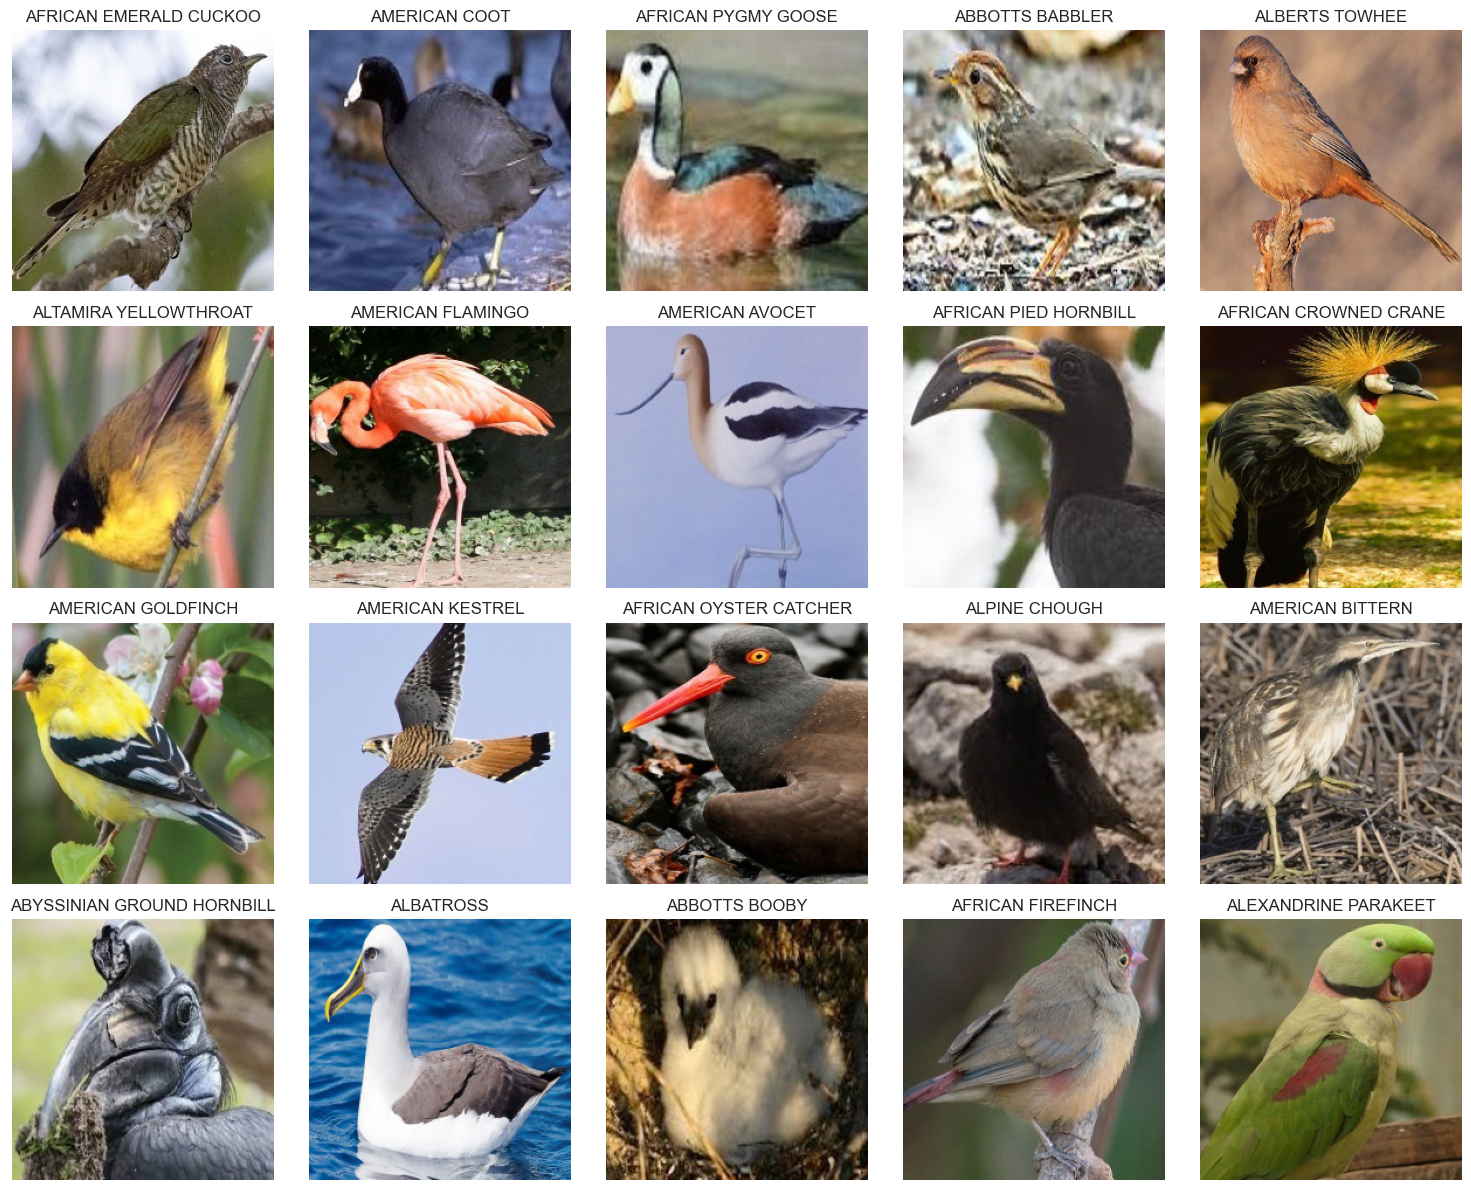

In [152]:
sns.set_style('darkgrid')

# Get the folder name (categories name ) located in train dataset path 
categories = [d.name for d in Path(train_data_dir).iterdir() if d.is_dir()]
example_images = [list(Path(train_data_dir).glob(f'{cat}/*'))[0] for cat in categories]  # get 1st img of each cat

# Define columns and rows for subplots
max_cols = 5
num_images = len(example_images)
num_rows = math.ceil(num_images / max_cols)  # 20/5 = 4 rows 

# Create subplots
fig, axes = plt.subplots(nrows = num_rows, ncols = max_cols, figsize=(15, 3 * num_rows))
axes = axes.flatten() # convert 2D array into 1D array for simplifying the indexs for the subplots

# Create a loop to show all the example images with its own category title
for ax, img_path, category in zip(axes, example_images, categories):
    ax.imshow(Image.open(img_path))
    ax.set_title(category)
    ax.axis('off')

plt.tight_layout()
plt.show()

In [138]:
example_images

[PosixPath('../Data/train/AFRICAN EMERALD CUCKOO/016.jpg'),
 PosixPath('../Data/train/AMERICAN COOT/016.jpg'),
 PosixPath('../Data/train/AFRICAN PYGMY GOOSE/162.jpg'),
 PosixPath('../Data/train/ABBOTTS BABBLER/162.jpg'),
 PosixPath('../Data/train/ALBERTS TOWHEE/016.jpg'),
 PosixPath('../Data/train/ALTAMIRA YELLOWTHROAT/016.jpg'),
 PosixPath('../Data/train/AMERICAN FLAMINGO/162.jpg'),
 PosixPath('../Data/train/AMERICAN AVOCET/162.jpg'),
 PosixPath('../Data/train/AFRICAN PIED HORNBILL/162.jpg'),
 PosixPath('../Data/train/AFRICAN CROWNED CRANE/016.jpg'),
 PosixPath('../Data/train/AMERICAN GOLDFINCH/016.jpg'),
 PosixPath('../Data/train/AMERICAN KESTREL/016.jpg'),
 PosixPath('../Data/train/AFRICAN OYSTER CATCHER/016.jpg'),
 PosixPath('../Data/train/ALPINE CHOUGH/162.jpg'),
 PosixPath('../Data/train/AMERICAN BITTERN/162.jpg'),
 PosixPath('../Data/train/ABYSSINIAN GROUND HORNBILL/162.jpg'),
 PosixPath('../Data/train/ALBATROSS/016.jpg'),
 PosixPath('../Data/train/ABBOTTS BOOBY/162.jpg'),
 Posi

### Shape of an example image

In [17]:
os.listdir(train_data_dir+'/AFRICAN EMERALD CUCKOO')[0]

'016.jpg'

In [21]:
african_emerald_cuckoo_img_1 = train_data_dir+'/AFRICAN EMERALD CUCKOO'+'/016.jpg'

In [23]:
# Check shape (dimensions) of an example image
imread(african_emerald_cuckoo_img_1).shape

(224, 224, 3)

According to the official docuementation, all images are 224 X 224 X 3 color images in jpg format.

### Number of image files in each directory/ subdirectory

In [26]:
# total number of images of the 4 datasets

print(len(list(pathlib.Path(train_data_dir).glob('*/*.jpg'))))   # */* look for .jpg files in the subdirectories
print(len(list(pathlib.Path(test_data_dir).glob('*/*.jpg'))))
print(len(list(pathlib.Path(valid_data_dir).glob('*/*.jpg'))))
print(len(list(pathlib.Path(predict_data_dir).glob('*.jpg'))))   # * look for .jpg files directly in the directory

3208
100
100
6


### Create train, test, valid dfs with labels (classes)

In [28]:
# train dataset w/ labels
train_data_dir = Path('../Data/train')

file_paths = []
labels = []

for class_dir in os.listdir(train_data_dir):
    class_path = train_data_dir / class_dir
    if os.path.isdir(class_path):
        for img_file in os.listdir(class_path):
            if img_file.lower().endswith(('.jpg')):
                file_paths.append(class_path / img_file)
                labels.append(class_dir)
                
train_df = pd.DataFrame({"file_path": [str(file_path) for file_path in file_paths], "label": labels})


# test dataset w/ labels
test_data_dir = Path('../Data/test')

file_paths = []
labels = []

for class_dir in os.listdir(test_data_dir):
    class_path = test_data_dir / class_dir
    if os.path.isdir(class_path):
        for img_file in os.listdir(class_path):
            if img_file.lower().endswith(('.jpg')):
                file_paths.append(class_path / img_file)
                labels.append(class_dir)
                
test_df = pd.DataFrame({"file_path": [str(file_path) for file_path in file_paths], "label": labels})

# validation dataset w/ labels
valid_data_dir = Path('../Data/valid')

file_paths = []
labels = []

for class_dir in os.listdir(valid_data_dir):
    class_path = valid_data_dir / class_dir
    if os.path.isdir(class_path):
        for img_file in os.listdir(class_path):
            if img_file.lower().endswith(('.jpg')):
                file_paths.append(class_path / img_file)
                labels.append(class_dir)
                
valid_df = pd.DataFrame({"file_path": [str(file_path) for file_path in file_paths], "label": labels})


In [30]:
train_df

,file_path,label
0,../Data/train/AFRICAN EMERALD CUCKOO/016.jpg,AFRICAN EMERALD CUCKOO
1,../Data/train/AFRICAN EMERALD CUCKOO/002.jpg,AFRICAN EMERALD CUCKOO
2,../Data/train/AFRICAN EMERALD CUCKOO/003.jpg,AFRICAN EMERALD CUCKOO
3,../Data/train/AFRICAN EMERALD CUCKOO/017.jpg,AFRICAN EMERALD CUCKOO
4,../Data/train/AFRICAN EMERALD CUCKOO/149.jpg,AFRICAN EMERALD CUCKOO
...,...,...
3203,../Data/train/ALEXANDRINE PARAKEET/026.jpg,ALEXANDRINE PARAKEET
3204,../Data/train/ALEXANDRINE PARAKEET/027.jpg,ALEXANDRINE PARAKEET
3205,../Data/train/ALEXANDRINE PARAKEET/033.jpg,ALEXANDRINE PARAKEET
3206,../Data/train/ALEXANDRINE PARAKEET/153.jpg,ALEXANDRINE PARAKEET


In [32]:
print(train_df.shape)
print(test_df.shape)
print(valid_df.shape)

(3208, 2)
(100, 2)
(100, 2)


### Create ImageDataGenerators (train, test, validation)+ CNN Model

ImageDataGenerator:
- Applies scaling to all image data.
- Applies data augmentation to train image data, including random rotation (between -20 and 20 degrees), random shift of images horizontally ad vertically (by up to 10% of the image width/height), random shearr transformation, random zooms in or out (by up to 10% of the image), random horizontal flip.

CNN Model:
-  Applies L2 regularization (penalty) from Keras to penallize large weight in order to prevent overfitting
-  Applies ReduceLROnPlateau to reduce the learning rate when the metric (validation loss) does not improve
<br></br>

In [34]:
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import ReduceLROnPlateau

# Training ImageDataGenerators with scaling and data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,          # scaling
    rotation_range=20,       # data augmentation
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)

# Test and Validation ImageDataGenerators with scaling
test_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

# Finalize Training generator
train_generator = train_datagen.flow_from_dataframe(
    train_df,
    x_col="file_path",
    y_col="label",
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=True
)

# Finalize Test and Validation generators
test_generator = test_datagen.flow_from_dataframe(
    test_df,
    x_col="file_path",
    y_col="label",
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)
# Finalize Test and Validation generators
validation_generator = validation_datagen.flow_from_dataframe(
    valid_df,
    x_col="file_path",
    y_col="label",
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)
# Initialize the model
cnn = Sequential()

# Input/Convolutional Layer + Polling layer + Dropout layer
cnn.add(Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu', input_shape=(224, 224, 3)))
cnn.add(MaxPool2D(strides=2))
cnn.add(Dropout(rate=0.25))

cnn.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'))
cnn.add(MaxPool2D(strides=2))
cnn.add(Dropout(rate=0.3))

cnn.add(Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu'))
cnn.add(MaxPool2D(strides=2))
cnn.add(Dropout(rate=0.3))

cnn.add(Conv2D(filters=256, kernel_size=(3,3), padding='same', activation='relu'))
cnn.add(MaxPool2D(strides=2))
cnn.add(Dropout(rate=0.4))

cnn.add(Flatten())

cnn.add(Dense(512, activation='relu', kernel_regularizer=l2(0.001)))
cnn.add(Dropout(rate=0.4))

cnn.add(Dense(256, activation='relu', kernel_regularizer=l2(0.001)))
cnn.add(Dropout(rate=0.3))

cnn.add(Dense(units=20, activation='softmax'))

optimizer = Adam(learning_rate=0.0001)
cnn.compile(optimizer=optimizer, metrics=['accuracy'], loss='categorical_crossentropy')

# Reduce learning rate when a metric has stopped improving.
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, verbose=1, min_lr=1e-6)

# print the summary of  model
print(cnn.summary())


Found 3208 validated image filenames belonging to 20 classes.
Found 100 validated image filenames belonging to 20 classes.
Found 100 validated image filenames belonging to 20 classes.


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 56, 56, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 14, 14, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 50176)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    25,690,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 20)             │         5,140 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 26,215,508 (100.00 MB)

 Trainable params: 26,215,508 (100.00 MB)

 Non-trainable params: 0 (0.00 B)

None


### Fit Model and Apply Early Stop

In [42]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

cnn.fit(
    train_generator,
    epochs=50,
    validation_data=validation_generator,
    callbacks=[early_stop, reduce_lr])

/opt/anaconda3/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 49s 480ms/step - accuracy: 0.0582 - loss: 4.3197 - val_accuracy: 0.0900 - val_loss: 4.0459 - learning_rate: 1.0000e-04
Epoch 2/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 48s 476ms/step - accuracy: 0.0949 - loss: 3.9321 - val_accuracy: 0.1900 - val_loss: 3.7179 - learning_rate: 1.0000e-04
Epoch 3/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 50s 497ms/step - accuracy: 0.1404 - loss: 3.5805 - val_accuracy: 0.1700 - val_loss: 3.4439 - learning_rate: 1.0000e-04
Epoch 4/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 50s 495ms/step - accuracy: 0.1901 - loss: 3.2969 - val_accuracy: 0.2700 - val_loss: 3.2348 - learning_rate: 1.0000e-04
Epoch 5/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 51s 501ms/step - accuracy: 0.2404 - loss: 3.0792 - val_accuracy: 0.2700 - val_loss: 3.1021 - learning_rate: 1.0000e-04
Epoch 6/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 51s 502ms/step - accuracy: 0.2520 - loss: 2.9618 - val_accuracy: 0.3300 - val_loss: 2.9401 - learning_rate: 1.0000e-04
Epoch 7/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 50s 49

In [43]:
train_generator.class_indices

{'ABBOTTS BABBLER': 0,
 'ABBOTTS BOOBY': 1,
 'ABYSSINIAN GROUND HORNBILL': 2,
 'AFRICAN CROWNED CRANE': 3,
 'AFRICAN EMERALD CUCKOO': 4,
 'AFRICAN FIREFINCH': 5,
 'AFRICAN OYSTER CATCHER': 6,
 'AFRICAN PIED HORNBILL': 7,
 'AFRICAN PYGMY GOOSE': 8,
 'ALBATROSS': 9,
 'ALBERTS TOWHEE': 10,
 'ALEXANDRINE PARAKEET': 11,
 'ALPINE CHOUGH': 12,
 'ALTAMIRA YELLOWTHROAT': 13,
 'AMERICAN AVOCET': 14,
 'AMERICAN BITTERN': 15,
 'AMERICAN COOT': 16,
 'AMERICAN FLAMINGO': 17,
 'AMERICAN GOLDFINCH': 18,
 'AMERICAN KESTREL': 19}

In [44]:
test_generator.class_indices

{'ABBOTTS BABBLER': 0,
 'ABBOTTS BOOBY': 1,
 'ABYSSINIAN GROUND HORNBILL': 2,
 'AFRICAN CROWNED CRANE': 3,
 'AFRICAN EMERALD CUCKOO': 4,
 'AFRICAN FIREFINCH': 5,
 'AFRICAN OYSTER CATCHER': 6,
 'AFRICAN PIED HORNBILL': 7,
 'AFRICAN PYGMY GOOSE': 8,
 'ALBATROSS': 9,
 'ALBERTS TOWHEE': 10,
 'ALEXANDRINE PARAKEET': 11,
 'ALPINE CHOUGH': 12,
 'ALTAMIRA YELLOWTHROAT': 13,
 'AMERICAN AVOCET': 14,
 'AMERICAN BITTERN': 15,
 'AMERICAN COOT': 16,
 'AMERICAN FLAMINGO': 17,
 'AMERICAN GOLDFINCH': 18,
 'AMERICAN KESTREL': 19}

In [45]:
validation_generator.class_indices

{'ABBOTTS BABBLER': 0,
 'ABBOTTS BOOBY': 1,
 'ABYSSINIAN GROUND HORNBILL': 2,
 'AFRICAN CROWNED CRANE': 3,
 'AFRICAN EMERALD CUCKOO': 4,
 'AFRICAN FIREFINCH': 5,
 'AFRICAN OYSTER CATCHER': 6,
 'AFRICAN PIED HORNBILL': 7,
 'AFRICAN PYGMY GOOSE': 8,
 'ALBATROSS': 9,
 'ALBERTS TOWHEE': 10,
 'ALEXANDRINE PARAKEET': 11,
 'ALPINE CHOUGH': 12,
 'ALTAMIRA YELLOWTHROAT': 13,
 'AMERICAN AVOCET': 14,
 'AMERICAN BITTERN': 15,
 'AMERICAN COOT': 16,
 'AMERICAN FLAMINGO': 17,
 'AMERICAN GOLDFINCH': 18,
 'AMERICAN KESTREL': 19}

### Metrics

In [46]:
metrics = pd.DataFrame(cnn.history.history)

In [47]:
print(metrics)

    accuracy      loss  val_accuracy  val_loss  learning_rate
0   0.059850  4.207555          0.09  4.045905       0.000100
1   0.102244  3.849113          0.19  3.717850       0.000100
2   0.154302  3.509602          0.17  3.443917       0.000100
3   0.196072  3.261101          0.27  3.234822       0.000100
4   0.228803  3.065817          0.27  3.102113       0.000100
5   0.253429  2.928367          0.33  2.940131       0.000100
6   0.284601  2.725313          0.39  2.757327       0.000100
7   0.302057  2.629876          0.44  2.579606       0.000100
8   0.346633  2.444012          0.44  2.392402       0.000100
9   0.389027  2.331442          0.46  2.231569       0.000100
10  0.403990  2.251613          0.48  2.157430       0.000100
11  0.426746  2.156019          0.55  2.003601       0.000100
12  0.449190  2.060533          0.54  1.959495       0.000100
13  0.457918  2.025331          0.60  1.848135       0.000100
14  0.476621  1.961553          0.56  1.903007       0.000100
15  0.52

In [200]:
# Sort the metrics by validation loss
metrics_sort = metrics.sort_values(by='val_loss',ascending=True)
metrics_sort

,accuracy,loss,val_accuracy,val_loss,learning_rate
45,0.774002,1.087052,0.86,0.847064,0.000050
48,0.787718,1.021442,0.83,0.857809,0.000025
49,0.790212,1.015250,0.84,0.863049,0.000025
44,0.770885,1.094647,0.86,0.866168,0.000050
43,0.774002,1.081133,0.85,0.882269,0.000050
47,0.788030,1.041786,0.83,0.889401,0.000050
41,0.754364,1.129520,0.87,0.893501,0.000050
46,0.792706,1.041640,0.83,0.900683,0.000050
42,0.765274,1.110363,0.84,0.906428,0.000050
39,0.749377,1.179866,0.83,0.922955,0.000050


The 45 Epoch has the smallest validation loss.

<Axes: >

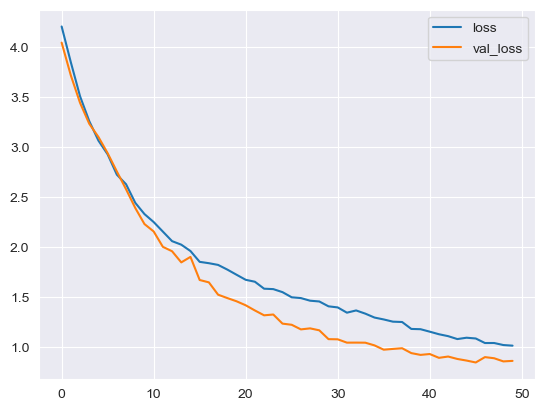

In [48]:
# Plot the training loss vs. validation loss
metrics[['loss','val_loss']].plot()

<Axes: >

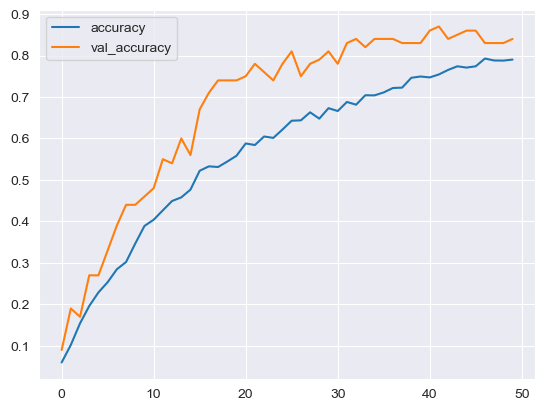

In [49]:
# Plot training accuracy vs. validation accuracy
metrics[['accuracy','val_accuracy']].plot()

### Model Accuracy Score

In [50]:
# Print accuracy and loss for test set
test_score = cnn.evaluate(test_generator, verbose=0)
print("Test loss:", test_score[0])
print("Test accuracy:", test_score[1])

/opt/anaconda3/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Test loss: 0.9115469455718994
Test accuracy: 0.8600000143051147


In [51]:
# Print accuracy and loss for validation set
val_score = cnn.evaluate(validation_generator, verbose=0)
print("Validation loss:", val_score[0])
print("Validation accuracy:", val_score[1])

Validation loss: 0.8470640778541565
Validation accuracy: 0.8600000143051147


In [52]:
y_true = valid_df['label']

In [53]:
y_true

0     AFRICAN EMERALD CUCKOO
1     AFRICAN EMERALD CUCKOO
2     AFRICAN EMERALD CUCKOO
3     AFRICAN EMERALD CUCKOO
4     AFRICAN EMERALD CUCKOO
               ...          
95      ALEXANDRINE PARAKEET
96      ALEXANDRINE PARAKEET
97      ALEXANDRINE PARAKEET
98      ALEXANDRINE PARAKEET
99      ALEXANDRINE PARAKEET
Name: label, Length: 100, dtype: object

In [54]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_true = label_encoder.fit_transform(valid_df['label'])

In [55]:
y_true

array([ 4,  4,  4,  4,  4, 16, 16, 16, 16, 16,  8,  8,  8,  8,  8,  0,  0,
        0,  0,  0, 10, 10, 10, 10, 10, 13, 13, 13, 13, 13, 17, 17, 17, 17,
       17, 14, 14, 14, 14, 14,  7,  7,  7,  7,  7,  3,  3,  3,  3,  3, 18,
       18, 18, 18, 18, 19, 19, 19, 19, 19,  6,  6,  6,  6,  6, 12, 12, 12,
       12, 12, 15, 15, 15, 15, 15,  2,  2,  2,  2,  2,  9,  9,  9,  9,  9,
        1,  1,  1,  1,  1,  5,  5,  5,  5,  5, 11, 11, 11, 11, 11])

In [56]:
validation_generator

In [57]:
pred = cnn.predict(validation_generator)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step 


In [58]:
pred

array([[2.8510498e-02, 1.6601862e-03, 1.0890483e-03, ..., 7.2588195e-04,
        3.8229155e-03, 1.4752188e-02],
       [1.0256706e-07, 4.8969839e-10, 1.6861187e-09, ..., 5.5856628e-11,
        5.1026581e-07, 1.7757339e-09],
       [1.9515320e-03, 2.2670865e-04, 8.1363868e-04, ..., 2.6596195e-05,
        4.1236300e-02, 4.3652318e-02],
       ...,
       [5.5393473e-05, 1.1131246e-05, 7.5384382e-06, ..., 9.7011580e-05,
        1.6529892e-05, 7.5327393e-06],
       [3.9346846e-06, 1.6672938e-07, 7.2236594e-07, ..., 2.9608617e-03,
        3.2216856e-05, 2.0287268e-06],
       [6.0018903e-04, 3.8933739e-04, 3.1090720e-04, ..., 3.1057561e-03,
        1.4361329e-04, 1.5073425e-04]], dtype=float32)

In [59]:
pred  =np.argmax(pred, axis=1)

In [60]:
pred

array([ 4,  4,  4,  4,  4, 16, 16, 16, 16, 12,  8,  8,  8,  8,  8,  0, 10,
        0,  0, 19, 15, 10, 10, 10, 10, 13, 16, 15, 13, 13, 17, 17, 17, 17,
       17, 14, 14, 14, 14, 14,  7,  7,  7, 15,  7,  3,  2,  3,  3,  3, 18,
       18, 18, 18, 18, 19, 19, 19,  2, 19,  6,  2,  6,  6,  6, 12, 12, 12,
       12, 12, 15, 15, 15, 15, 15,  2,  2,  2,  2,  2, 14, 16,  9,  9,  1,
        1,  1,  1,  1,  9,  5,  5,  5,  5,  5, 11, 11, 11, 11, 11])

In [61]:
print(classification_report(y_true=y_true,y_pred=pred))

              precision    recall  f1-score   support

           0       1.00      0.60      0.75         5
           1       0.80      0.80      0.80         5
           2       0.62      1.00      0.77         5
           3       1.00      0.80      0.89         5
           4       1.00      1.00      1.00         5
           5       1.00      1.00      1.00         5
           6       1.00      0.80      0.89         5
           7       1.00      0.80      0.89         5
           8       1.00      1.00      1.00         5
           9       0.67      0.40      0.50         5
          10       0.80      0.80      0.80         5
          11       1.00      1.00      1.00         5
          12       0.83      1.00      0.91         5
          13       1.00      0.60      0.75         5
          14       0.83      1.00      0.91         5
          15       0.62      1.00      0.77         5
          16       0.67      0.80      0.73         5
          17       1.00    

### Predicting New Image 1

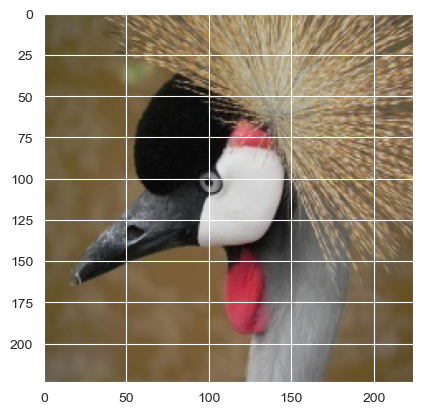

In [63]:
from PIL import Image

img = Image.open('../Data/images to predict/1.jpg')

plt.imshow(img)

In [64]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

datagen_new1 = ImageDataGenerator(rescale=1./255)
# Load your image for prediction
img = image.load_img('../Data/images to predict/1.jpg', target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0) 

pred_new = cnn.predict(x)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


In [65]:
pred_new

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.]], dtype=float32)

In [66]:
pred_new_class = np.argmax(pred_new, axis=1)
print(pred_new_class)

[3]


In [67]:
# Inverse the class_indices dictionary
class_names = {v: k for k, v in train_generator.class_indices.items()}

# Get the class name from the predicted index
predicted_class_name = class_names[pred_new_class[0]]

print(predicted_class_name)

AFRICAN CROWNED CRANE


### Predict All New 6 Images

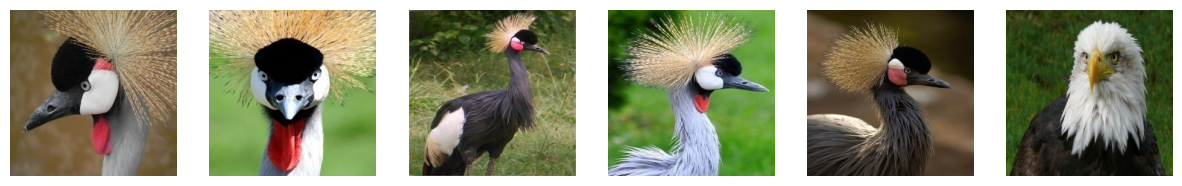

In [100]:
from PIL import Image

img_1 = Image.open('../Data/images to predict/1.jpg')
img_2 = Image.open('../Data/images to predict/2.jpg')
img_3 = Image.open('../Data/images to predict/3.jpg')
img_4 = Image.open('../Data/images to predict/4.jpg')
img_5 = Image.open('../Data/images to predict/5.jpg')
img_6 = Image.open('../Data/images to predict/6.jpg')

images = [img_1, img_2, img_3, img_4, img_5, img_6]

fig, axes = plt.subplots(1, 6, figsize=(15, 3))

for ax, img in zip(axes, images):
    ax.imshow(img)
    ax.axis('off')

plt.show()

In [209]:
# Create a function for prediction
def predict_images_in_folder(folder_path, model, target_size=(224, 224)):
    # Get all image files from the folder
    image_files = [f for f in os.listdir(folder_path) if f.endswith(('.jpg', '.jpeg', '.png'))]
    
    # Create an image data generator (if needed)
    datagen = ImageDataGenerator(rescale=1./255)
    
    # Loop through the images and predict
    predictions = []
    
    for img_file in image_files[:6]:  # Limit to the first 6 images
        img_path = os.path.join(folder_path, img_file)

        # Load your image for prediction
        img = image.load_img(img_path, target_size=(224, 224))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0) 

        pred_new = cnn.predict(x)
        
        # Get predicted class
        pred_class = np.argmax(pred_new, axis=1)
        
        # Map the predicted class to its corresponding label
        class_names = {v: k for k, v in train_generator.class_indices.items()}
        predicted_class_name = class_names[pred_class[0]]
        
        # Save the result
        predictions.append((img_file, predicted_class_name))
    
    return predictions

# Specify the folder path containing the images to predict
folder_path = '../Data/images to predict'

# Call the function and get predictions for 6 images
predictions = predict_images_in_folder(folder_path, cnn)

# Print predictions
for img_file, predicted_class_name in predictions:
    print(f"Image: {img_file} | Predicted Class: {predicted_class_name}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Image: 4.jpg | Predicted Class: AFRICAN CROWNED CRANE
Image: 5.jpg | Predicted Class: AFRICAN CROWNED CRANE
Image: 6.jpg | Predicted Class: ABBOTTS BOOBY
Image: 2.jpg | Predicted Class: AFRICAN CROWNED CRANE
Image: 3.jpg | Predicted Class: AFRICAN CROWNED CRANE
Image: 1.jpg | Predicted Class: AFRICAN CROWNED CRANE


In [ ]:
break()

<br></br>

###  Save and Load the Trained Model

#### Channel 1 : Use built-in Model.save function with keras format

In [220]:
# Save
cnn.save('cnn_model.keras')

# Load
from tensorflow.keras.models import load_model
cnn_trained_model = load_model('cnn_model.keras', compile=False)

In [222]:
cnn_trained_model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [224]:
datagen_new1 = ImageDataGenerator(rescale=1./255)
# Load your image for prediction
img = image.load_img('../Data/images to predict/1.jpg', target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0) 

pred_new = cnn_trained_model.predict(x)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


In [226]:
pred_new

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.]], dtype=float32)

In [228]:
pred_new_class = np.argmax(pred_new, axis=1)
print(pred_new_class)

[3]


In [230]:
# Inverse the class_indices dictionary
class_names = {v: k for k, v in train_generator.class_indices.items()}

# Get the class name from the predicted index
predicted_class_name = class_names[pred_new_class[0]]

print(predicted_class_name)

AFRICAN CROWNED CRANE


In [ ]:
break()

<br></br>

#### Channel 2 : Use Pickle library to dump and load the trained model

In [102]:
# loading library
import pickle

In [104]:
# create an iterator object with write permission - model.pkl
with open('model_pkl', 'wb') as files:
    pickle.dump(cnn, files)

In [106]:

# load saved model
with open('model_pkl' , 'rb') as f:
    lr = pickle.load(f)

In [108]:

datagen_new1 = ImageDataGenerator(rescale=1./255)
# Load your image for prediction
img = image.load_img('../Data/images to predict/1.jpg', target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0) 

pred_new = lr.predict(x)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


In [110]:
pred_new

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.]], dtype=float32)

In [112]:
pred_new_class = np.argmax(pred_new, axis=1)
print(pred_new_class)

[3]


In [114]:
# Inverse the class_indices dictionary
class_names = {v: k for k, v in train_generator.class_indices.items()}

# Get the class name from the predicted index
predicted_class_name = class_names[pred_new_class[0]]

print(predicted_class_name)

AFRICAN CROWNED CRANE
